In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from glob import glob

In [3]:
import lanelines
import straightlanespipeline as slp 

from compgraph import CompGraph, CompGraphRunner
import nxpd
nxpd.nxpdParams['show'] = 'ipynb'

In [4]:
im_straight_1 = lanelines.open_image('test_images/straight_lines1.jpg')
im_straight_2 = lanelines.open_image('test_images/straight_lines2.jpg')

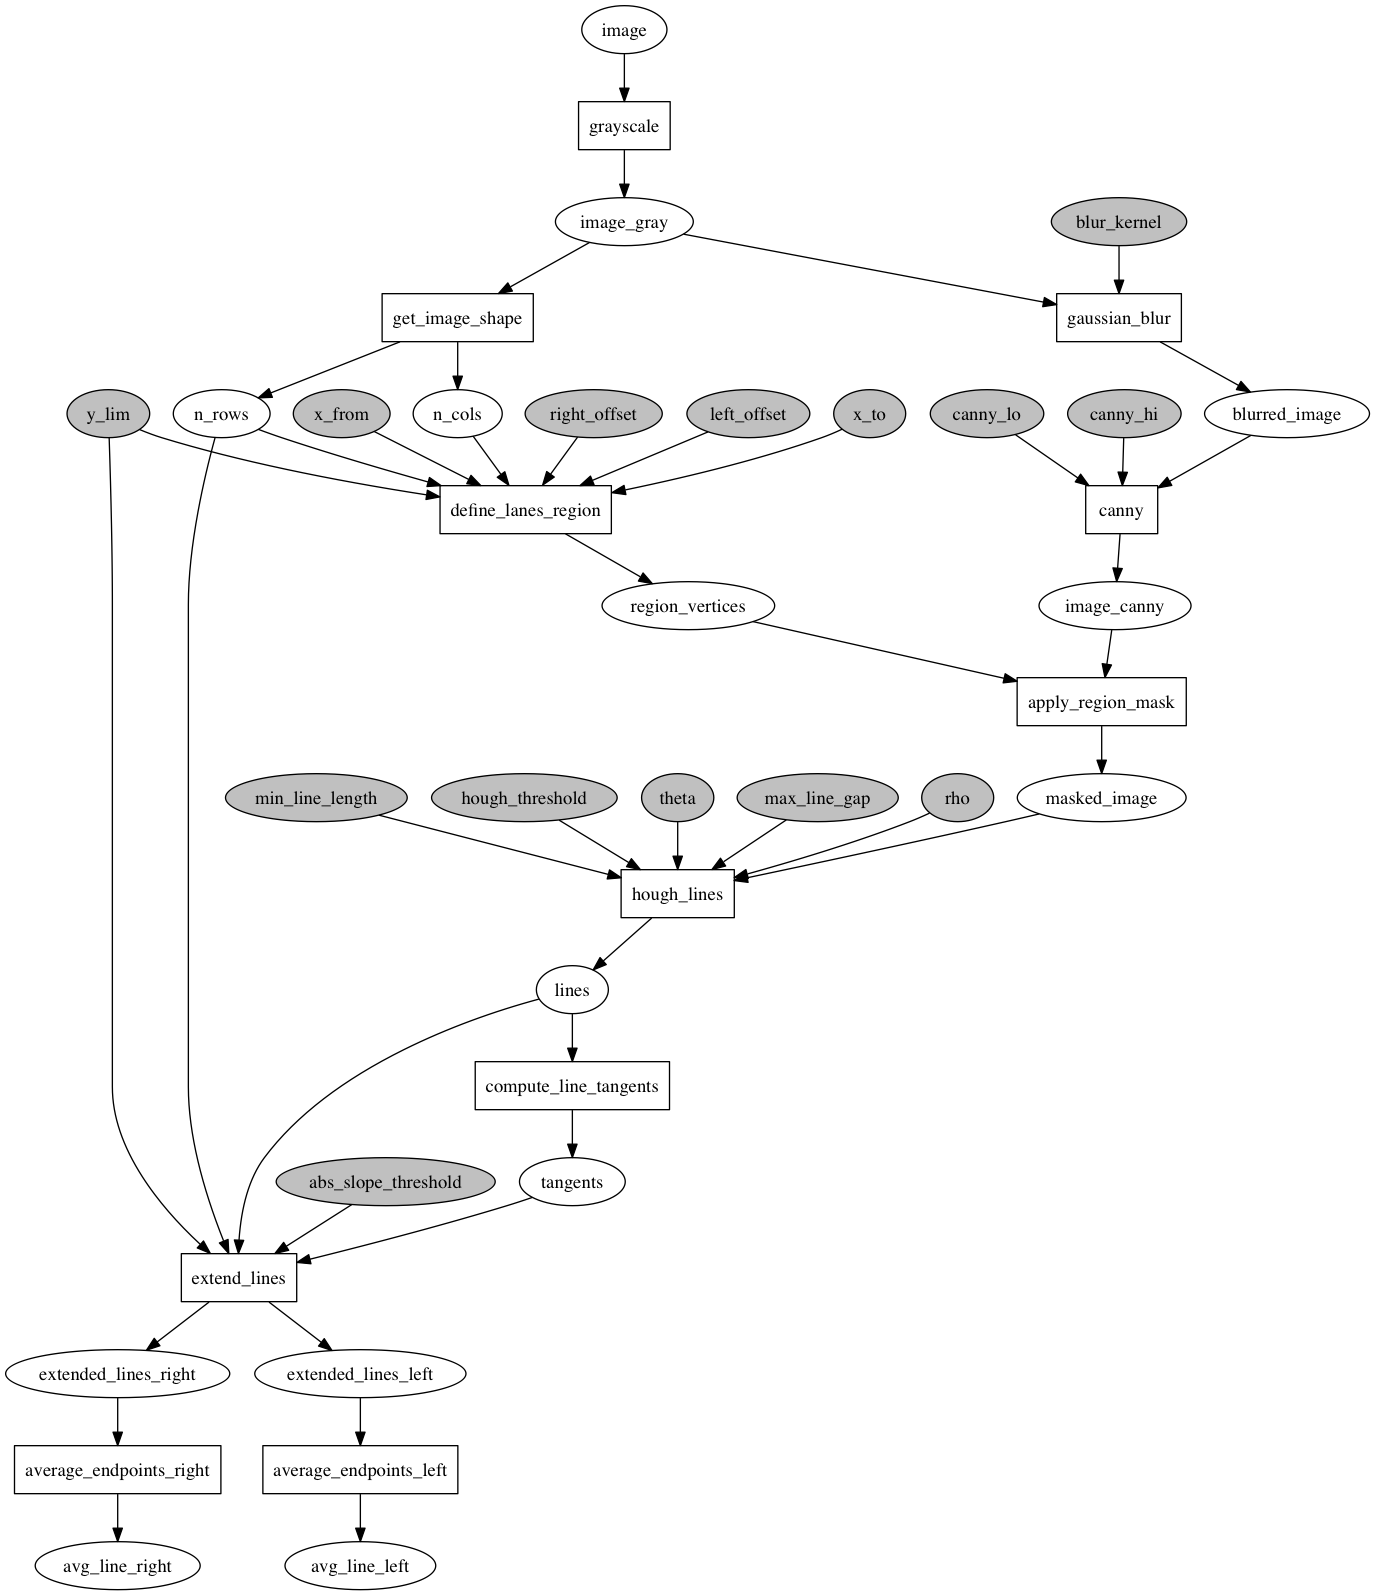

In [5]:
cg = slp.computational_graph
cg_params = slp.parameters

runner = CompGraphRunner(cg, frozen_tokens=cg_params)
nxpd.draw(runner.token_manager.to_networkx())

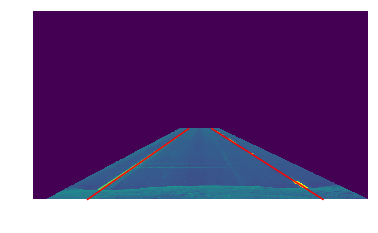

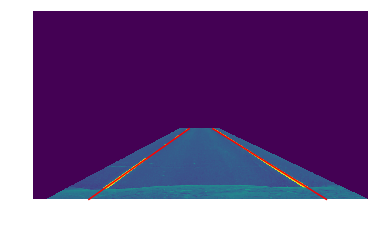

In [6]:
for im in (im_straight_1, im_straight_2):
    runner.run(image=im)
    
    plt.figure()
    plt.imshow( lanelines.apply_region_mask(runner['image_gray'], runner['region_vertices']) )
    plt.axis("off")
    
    lanelines.plot_line(runner['avg_line_left'], color='r')
    lanelines.plot_line(runner['avg_line_right'], color='r')